# [Pandas](http://pandas.pydata.org)

Библиотека для работы с данными и таблицами в питоне.

In [211]:
import numpy as np
import pandas as pd
import seaborn as sns
import pylab as plt

## Основные структуры

Основными структурами данных в **Pandas** являются классы **Series** и **DataFrame**.  
Первый из них представляет собой одномерный индексированный массив данных некоторого фиксированного типа. Мы можем думать о Series как о векторе из [numpy](https://numpy.org/).  

## [Series](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

Одномерный индексированный массив данных некоторого фиксированного типа. Мы можем думать о Series как о массиве из [numpy](https://numpy.org/).

In [212]:
salaries = pd.Series(data = [80000, 67000, 75000], 
           index = ['Андрей', 'Владимир', 'Мария Антуанетта']) 
print(salaries)        

Андрей              80000
Владимир            67000
Мария Антуанетта    75000
dtype: int64


In [213]:
type(salaries)

pandas.core.series.Series

### Возможности Series

#### Собственные методы
Некоторые популярные процедуры для работы с данными реализованы как собственные методы типа Series

In [214]:
salaries.mean(), salaries.std(), salaries.quantile(.75)

(74000.0, 6557.438524302001, 77500.0)

#### Использлвание numpy

Функции numpy принимают Series и могут с ними работать. Согласно [документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/dsintro.html#series-is-ndarray-like) `Series acts very similarly to a ndarray and is a valid argument to most NumPy functions.`. Это означает, что часто функции из numpy отработают с Series как с np.ndarray

In [215]:
np.mean(salaries)

74000.0

In [216]:
np.log2(salaries)

Андрей              16.2877
Владимир            16.0319
Мария Антуанетта    16.1946
dtype: float64

Series поддерживают операторы сравнения:

In [217]:
big_salaries = salaries > salaries.mean()
big_salaries

Андрей               True
Владимир            False
Мария Антуанетта     True
dtype: bool

Индексацию коллекцией булов типов можно использовать для построения выборки из Series по условию:

In [218]:
salaries[salaries > salaries.mean()] #по сути используем булеву маску в numpy array

Андрей              80000
Мария Антуанетта    75000
dtype: int64

In [219]:
salaries[[True, False, False]]

Андрей    80000
dtype: int64

Мы можем обращаться к элементам pd.Series как `salaries['Name']` или `salaries.Name`. Вариант через точку менее гибок: нельзя обратиться к имени, содержащему пробел, например

In [220]:
salaries.Андрей, salaries['Андрей'], salaries['Мария Антуанетта']

(80000, 80000, 75000)

Можно добавлять новые элементы, обращаясь к несуществующему элементу:

In [221]:
salaries['Кот'] = 100500
salaries

Андрей               80000
Владимир             67000
Мария Антуанетта     75000
Кот                 100500
dtype: int64

 Также, значением в pd.Series может быть `np.nan` (not a number), который может быть написан явно, а может соответствовать неизвестному значению в исходных данных:  

In [222]:
salaries['Шрек Третий'] = np.nan
salaries

Андрей               80000.0
Владимир             67000.0
Мария Антуанетта     75000.0
Кот                 100500.0
Шрек Третий              NaN
dtype: float64

В данных часто бывают пропуски, поэтому вы часто будете видеть `np.nan`.  
Важно уметь находить их и обрабатывать.  
Получим битовую маску для пропущенных значений: 

In [223]:
salaries.isnull()

Андрей              False
Владимир            False
Мария Антуанетта    False
Кот                 False
Шрек Третий          True
dtype: bool

In [224]:
salaries[salaries.isnull()]

Шрек Третий   NaN
dtype: float64

Назначим минимальную зарплату всем, у кого ее нет: 

In [225]:
salaries[salaries.isnull()] = 1
salaries

Андрей               80000.0
Владимир             67000.0
Мария Антуанетта     75000.0
Кот                 100500.0
Шрек Третий              1.0
dtype: float64

## [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html)

**Dataframe** - это двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа Series. 

Структура DataFrame отлично подходит для представления реальных данных: строки соответствуют признаковым описаниям отдельных объектов, а столбцы соответствуют признакам.

### Создание Датафрейма 

Создадим pd.DataFrame из единичной numpy-матрицы:

In [226]:
df1 = pd.DataFrame(data = np.eye(3), 
                   index=['a', 'b', 'c'], 
                   columns=['col1', 'col2', 'col3'],
                   dtype=int)
df1

,col1,col2,col3
a,1,0,0
b,0,1,0
c,0,0,1


Можно создавать pd.DataFrame из словаря.  
Ключами будут названия столбцов, а значениями - списки значений в этих столбцах.  
pd.DataFrame может хранить значения любых типов. Но в пределах одного столбца тип может быть только один:  

In [227]:
dictionary = {
    'A': np.arange(3),
    'B': ['a', 'b', 'c'],
    'C': np.arange(3) > 1
}
df1 = pd.DataFrame(dictionary)
df1

,A,B,C
0,0,a,False
1,1,b,False
2,2,c,True


Столбцу присваивается тип numpy.array, из которого он появился, но в общем случае тип столбца [не обязан](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.api.extensions.ExtensionDtype.html#pandas.api.extensions.ExtensionDtype) быть нумпаевским типом

In [228]:
df1.dtypes

A     int32
B    object
C      bool
dtype: object

## Индексация: at, loc, iloc.

Можем обращаться к отдельному элементу в таблице через `at` (это быстро):

In [229]:
df1.at[2, 'B']

'c'

Можем обращаться к куску таблицы через loc (это всего лишь в [22 раза медленнее](https://stackoverflow.com/questions/37216485/pandas-at-versus-loc), чем at):

In [230]:
df1.loc[1:2, ['A', 'B']]

,A,B
1,1,b
2,2,c


Чтобы обращаться к столбцу по индексу (они там есть, хоть явно и не указаны) можно воспользоваться функцией `iloc`, которая работает аналогично `loc`

In [231]:
df1.iloc[1:3, 1:3]

,B,C
1,b,False
2,c,True


Можем изменять элементы, обращаясь к ним через `at` и присваивая значение:

In [232]:
df1.at[2, 'B'] = 'ну, пусть так'
df1

,A,B,C
0,0,a,False
1,1,b,False
2,2,"ну, пусть так",True


С помощью loc можно изменять сразу всю строку.  
И даже создавать новые. Заметим, что индексы вообще говоря идут совсем не подряд и даже не по порядку.

In [233]:
df1.loc[2] = [2,'c', True]
df1.loc[17] = [17, '!', False]
df1.loc[9] = [9, '!', False]
df1

,A,B,C
0,0,a,False
1,1,b,False
2,2,c,True
17,17,!,False
9,9,!,False


Чтобы удалить строки, можно воспользоваться функцией `drop`

In [234]:
df1 = df1.drop([1,9,17])
df1

,A,B,C
0,0,a,False
2,2,c,True


## [copy](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html), [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html), nan-ы

Создадим копию нашей таблицы без последнего столбца.  
Затем, присоединим новую таблицу к старой и посмотрим, что будет.

In [235]:
df1_copy = df1.copy().loc[:, ['A', 'B']]
df1_copy = df1.append(df1_copy)
df1_copy

,A,B,C
0,0,a,False
2,2,c,True
0,0,a,NaN
2,2,c,NaN


Вообще говоря так делать - плохо, потому что появляются дубли индексов и это ломает доступ по индексу, так как обращение становится неоднозначным.

In [236]:
try:
    df1_copy[0]
except KeyError:
    print('too many objects with the same index')

too many objects with the same index


Чтобы индексация была валидной, нужно провести реиндексацию фрейма.

In [237]:
df1_copy.reset_index(drop=True) # флаг drop - означает, что мы удаляем старый индекс, иначе - он просто станет столбцом

,A,B,C
0,0,a,False
1,2,c,True
2,0,a,NaN
3,2,c,NaN


Вот теперь можно валидно работать с таблицей.

Заметим, что 
* при взятии loc и других операций начальная таблица не изменяется
* значения, которые мы не знали, заполнились NaN.

Давайте выкинем все строки/столбцы, в которых есть NaN. (Для столбцов - `axis=1`)

In [238]:
df1_copy.dropna(axis=0)

,A,B,C
0,0,a,False
2,2,c,True


Заменим все NaN каким-то значением:

In [239]:
df1_copy.fillna(False)

,A,B,C
0,0,a,False
2,2,c,True
0,0,a,False
2,2,c,False


## Нечисловые индексы. MultiIndex.
Вообще говоря, никто не запрещает делать нечисловые индексы, как и колонки. В этом случае к ним придется обращаться по тому индексу, как они обозначены.

In [240]:
index = ['Firefox', 'Chrome', 'Safari', 'IE10', 'Konqueror']
df3 = pd.DataFrame({
   'http_status': [200,200,404,404,301],
   'response_time': [0.04, 0.02, 0.07, 0.08, 1.0]},
    index=index)
df3

,http_status,response_time
Firefox,200,0.04
Chrome,200,0.02
Safari,404,0.07
IE10,404,0.08
Konqueror,301,1.00


In [241]:
df3.loc['Firefox']

http_status      200.00
response_time      0.04
Name: Firefox, dtype: float64

`iloc` будет работать с обычными индексами по строке

In [242]:
df3.iloc[0,1]

0.04

Нечисловая индексация особо часто встречается при группировках - о них ниже.

Можно делать еще более сложные вещи, а именно многоуровневые индексы и многоуровневые колонки. Именно благодаря устройству мультииндексов мы можем удобно группировать объекты. 

In [243]:
idx = pd.MultiIndex.from_product([['Zara', 'LV', 'Roots'],
                                  ['Orders', 'GMV', 'AOV']],
                                 names=['Brand', 'Metric'])
col = ['Yesterday', 'Yesterday-1', 'Yesterday-7', 'Thirty day average']

df_mul = pd.DataFrame('-', idx, col)
df_mul

Yesterday Yesterday-1 Yesterday-7 Thirty day average
Brand Metric                                                     
Zara  Orders         -           -           -                  -
      GMV            -           -           -                  -
      AOV            -           -           -                  -
LV    Orders         -           -           -                  -
      GMV            -           -           -                  -
      AOV            -           -           -                  -
Roots Orders         -           -           -                  -
      GMV            -           -           -                  -
      AOV            -           -           -                  -

In [244]:
df_mul.loc['Zara', 'Orders']

Yesterday             -
Yesterday-1           -
Yesterday-7           -
Thirty day average    -
Name: (Zara, Orders), dtype: object

In [245]:
df_mul.at[('Zara', 'Orders'), 'Yesterday-1']

'-'

## Чтение из файла

Основным форматом для хранения и передачи фреймов является - `CSV` (comma separated values / разделение по запятой). Можно читать данные абсолютно разных форматов `.txt`, `.tsv` или `.xlsx`. Но нужно аккуратно работать с `header`-ами и индексами, чтобы данные не потерялись.
* [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html#pandas.read_csv)
* [read_fwf](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html#pandas.read_fwf)
* [read_excel](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

Загрузим небольшой csv-файл по финансовой отчетности.

In [246]:
df = pd.read_csv('data/data_type.csv')

В Jupyter-ноутбуках датафреймы `Pandas` выводятся в виде вот таких красивых табличек, и `print(df)` выглядит хуже.

In [247]:
print(df)

   Customer Number     Customer Name         2016          2017  \
0          10002.0  Quest Industries  $125,000.00    $162500.00   
1         552278.0    Smith Plumbing  $920,000.00  $101,2000.00   
2          23477.0   ACME Industrial   $50,000.00     $62500.00   
3          24900.0        Brekke LTD  $350,000.00    $490000.00   
4         651029.0         Harbor Co   $15,000.00     $12750.00   

  Percent Growth Jan Units  Month  Day  Year Active  
0         30.00%       500      1   10  2015      Y  
1         10.00%       700      6   15  2014      Y  
2         25.00%       125      3   29  2016      Y  
3          4.00%        75     10   27  2015      Y  
4        -15.00%    Closed      2    2  2014      N  


Размеры матрицы получаем как в numpy

In [248]:
df.shape

(5, 10)

И можно получить имена колонок

In [249]:
df.columns

Index(['Customer Number', 'Customer Name', '2016', '2017', 'Percent Growth',
       'Jan Units', 'Month', 'Day', 'Year', 'Active'],
      dtype='object')

## [Типы данных](https://pbpython.com/pandas_dtypes.html) 


Чтобы посмотреть общую информацию по датафрейму и всем признакам, воспользуемся методом **`info`**:

In [250]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Number  5 non-null      float64
 1   Customer Name    5 non-null      object 
 2   2016             5 non-null      object 
 3   2017             5 non-null      object 
 4   Percent Growth   5 non-null      object 
 5   Jan Units        5 non-null      object 
 6   Month            5 non-null      int64  
 7   Day              5 non-null      int64  
 8   Year             5 non-null      int64  
 9   Active           5 non-null      object 
dtypes: float64(1), int64(3), object(6)
memory usage: 528.0+ bytes


На самом деле в pandas есть всего 5 основных типов данных: `bool`, `int64`, `float64`,`datetime64` и `object`. Любая строка, функция, класс - все 'сложное' воспринимается как `object`.

## Предобработка типов

**Изменить тип колонки** можно с помощью метода `astype`.

In [251]:
df['Customer Number'] = df['Customer Number'].astype('int64')

Признак `Jan Units` так кастануть не выйдет из-за значения `Closed`. Но так как - это исключительное значение, мы можем произвести каст через `to_numeric`, тогда все, что не кастуется, заменится на `Nan`.

In [252]:
df['Jan Units'] = pd.to_numeric(df['Jan Units'], errors='coerce') #флаг errors - чтобы то, что не скастовалось стало Nan.

Получить дату можно с помощью метода `to_datetime`

In [253]:
df['Date'] = pd.to_datetime(df[['Month', 'Day', 'Year']]) #заметим как легко мы создали новую колонку

In [254]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Date
0,10002,Quest Industries,"$125,000.00",$162500.00,30.00%,500.0,1,10,2015,Y,2015-01-10
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700.0,6,15,2014,Y,2014-06-15
2,23477,ACME Industrial,"$50,000.00",$62500.00,25.00%,125.0,3,29,2016,Y,2016-03-29
3,24900,Brekke LTD,"$350,000.00",$490000.00,4.00%,75.0,10,27,2015,Y,2015-10-27
4,651029,Harbor Co,"$15,000.00",$12750.00,-15.00%,NaN,2,2,2014,N,2014-02-02


## Методы [apply](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html), [map](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html), [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html).

Чтобы выполнить замену по словарю в колонке `Active` можно воспользоваться методом `pd.Series.map` или `pd.DataFrame.replace`.

In [255]:
d = {'N' : False, 'Y' : True}
df['Active'].map(d)

0     True
1     True
2     True
3     True
4    False
Name: Active, dtype: bool

In [256]:
df = df.replace({'Active': d})
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Date
0,10002,Quest Industries,"$125,000.00",$162500.00,30.00%,500.0,1,10,2015,True,2015-01-10
1,552278,Smith Plumbing,"$920,000.00","$101,2000.00",10.00%,700.0,6,15,2014,True,2014-06-15
2,23477,ACME Industrial,"$50,000.00",$62500.00,25.00%,125.0,3,29,2016,True,2016-03-29
3,24900,Brekke LTD,"$350,000.00",$490000.00,4.00%,75.0,10,27,2015,True,2015-10-27
4,651029,Harbor Co,"$15,000.00",$12750.00,-15.00%,NaN,2,2,2014,False,2014-02-02


`map` позволяет в качестве аргумента передать функцию, а не только маппинг или значение. `map` работает с Series, а `replace` с DataFrame. Обычно для одного и того же маппинга `replace` медленнее, так как задизайнен для работы с датафреймом и вынужден новый фрейм собирать. Однако, если надо сделать маппинг для нескольких колонок, то `replace` начинает выигрывать у множественных вызовов `map`

Осталось только преобразовать колонки с деньгами и процентами во что-то численное, для этого воспользуемся методом `apply` и напишем lambda-функцию

In [257]:
convert = lambda x : float(x.replace(',','').replace('$', '').replace('%',''))

Эта функция убирает все ненужные символы из цифр и конвертирует строку в float. 

In [258]:
df['2016'] = df['2016'].apply(convert)
df['2017'] = df['2017'].apply(convert)
df['Percent Growth'] = df['Percent Growth'].apply(convert)

In [259]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Date
0,10002,Quest Industries,125000.0,162500.0,30.0,500.0,1,10,2015,True,2015-01-10
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700.0,6,15,2014,True,2014-06-15
2,23477,ACME Industrial,50000.0,62500.0,25.0,125.0,3,29,2016,True,2016-03-29
3,24900,Brekke LTD,350000.0,490000.0,4.0,75.0,10,27,2015,True,2015-10-27
4,651029,Harbor Co,15000.0,12750.0,-15.0,NaN,2,2,2014,False,2014-02-02


## Настройки Pandas

Чтобы у нас не возникало проблемы с отображением `float` мы можем поменять настройки pandas.

In [260]:
pd.set_option('precision', 4) #устанавливаем количество значящих (ненулевых) символов 

In [261]:
df

,Customer Number,Customer Name,2016,2017,Percent Growth,Jan Units,Month,Day,Year,Active,Date
0,10002,Quest Industries,125000.0,162500.0,30.0,500.0,1,10,2015,True,2015-01-10
1,552278,Smith Plumbing,920000.0,1012000.0,10.0,700.0,6,15,2014,True,2014-06-15
2,23477,ACME Industrial,50000.0,62500.0,25.0,125.0,3,29,2016,True,2016-03-29
3,24900,Brekke LTD,350000.0,490000.0,4.0,75.0,10,27,2015,True,2015-10-27
4,651029,Harbor Co,15000.0,12750.0,-15.0,NaN,2,2,2014,False,2014-02-02


Также мы можем поменять отображение датафрейма с помощью `set_option`

In [262]:
pd.set_option('display.max_columns', 5)
pd.set_option('display.max_rows', 2)

In [263]:
df

,Customer Number,Customer Name,...,Active,Date
0,10002,Quest Industries,...,True,2015-01-10
...,...,...,...,...,...
4,651029,Harbor Co,...,False,2014-02-02


Этим можно пользоваться когда у вас очень большие таблицы. Сейчас нам это не нужно.

In [264]:
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 10)

## Добавление и удаление колонок

Можно легко добавить колонку общей суммы(любой функции) для колонок `2016` и `2017`

In [265]:
df['Sum'] = df['2016'] + df['2017']

Теперь нам не нужны отдельные колонки для годов и для дат, так как есть объеденненные. Давайте удалим их.

In [266]:
df_final = df.drop(['2016', '2017', 'Year', 'Month', 'Day'], axis=1) #обязательно указываем axis=1 для работы с колонками, а не со строками!

In [267]:
df_final

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0
2,23477,ACME Industrial,25.0,125.0,True,2016-03-29,112500.0
3,24900,Brekke LTD,4.0,75.0,True,2015-10-27,840000.0
4,651029,Harbor Co,-15.0,NaN,False,2014-02-02,27750.0


## Сортировка. Reindex.

Новые колонки добавились в конец, это не всегда удобно (Но обычно без разницы). Мы можем отсортировать колонки с помощью переиндексации. Мы задаем порядок названий колонок, и просим DataFrame выдать их в нужном порядке. 

In [268]:
df_final.reindex(sorted(df_final.columns), axis=1)

,Active,Customer Name,Customer Number,Date,Jan Units,Percent Growth,Sum
0,True,Quest Industries,10002,2015-01-10,500.0,30.0,287500.0
1,True,Smith Plumbing,552278,2014-06-15,700.0,10.0,1932000.0
2,True,ACME Industrial,23477,2016-03-29,125.0,25.0,112500.0
3,True,Brekke LTD,24900,2015-10-27,75.0,4.0,840000.0
4,False,Harbor Co,651029,2014-02-02,NaN,-15.0,27750.0


Или можно сделать произвольную сортировку строк.

In [269]:
df_final.reindex([4,3,0,1,2], axis=0)

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
4,651029,Harbor Co,-15.0,NaN,False,2014-02-02,27750.0
3,24900,Brekke LTD,4.0,75.0,True,2015-10-27,840000.0
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0
2,23477,ACME Industrial,25.0,125.0,True,2016-03-29,112500.0


Но обычно мы хотим отсортировать по значению колонки, для этого есть `sort_values`

In [270]:
df_final.sort_values(by = 'Customer Name') #сортируем строки в алфавитном порядке

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
2,23477,ACME Industrial,25.0,125.0,True,2016-03-29,112500.0
3,24900,Brekke LTD,4.0,75.0,True,2015-10-27,840000.0
4,651029,Harbor Co,-15.0,NaN,False,2014-02-02,27750.0
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0


Можно сортировать сразу по нескольким критериям и устанавливать для них порядок.

In [271]:
df_final.sort_values(by = ['Active', 'Date'], ascending=[1, 0])

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
4,651029,Harbor Co,-15.0,NaN,False,2014-02-02,27750.0
2,23477,ACME Industrial,25.0,125.0,True,2016-03-29,112500.0
3,24900,Brekke LTD,4.0,75.0,True,2015-10-27,840000.0
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0


## Индексация по маскам

Очень удобной является логическая индексация `DataFrame` по маске. 

Мы делаем условное выражение для **одного** столбца, а потом объединяем несколько условий в одну маску. 

In [272]:
cond1 = df_final['Sum'] > 200000
cond2 = df_final['Date'] < '2015-06-01'

mask = cond1 & cond2
df_final[mask]

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0


In [273]:
# Или, что то же самое, но менее читаемо:
df_final[(df_final['Sum'] > 200000) & (df_final['Date'] < '2015-06-01')]

,Customer Number,Customer Name,Percent Growth,Jan Units,Active,Date,Sum
0,10002,Quest Industries,30.0,500.0,True,2015-01-10,287500.0
1,552278,Smith Plumbing,10.0,700.0,True,2014-06-15,1932000.0


Заметим, что мы используем одинарные операторы `&` вместо `&&` или `and`. Вообще мыслить о маске лучше как о битовом векторе, к которому  мы поэлементно применяем битовую операцию. 

In [274]:
cond1 ^ cond2 #xor почему бы и нет

0    False
1    False
2    False
3     True
4     True
dtype: bool

## Строковые операции

Мы узнали, что в DataFrame отсутствует тип `string` и по сути все, что не число - является строкой. 

Но зато для Series - это не так, так как Series - это практически `numpy.ndarray`, в котором есть строки. Поэтому для работы со строками у нас есть специальные методы.

Возьмем данные с большим количеством строк, а именно... данные о сражениях в "Игре Престолов". 

In [275]:
battles=pd.read_csv('data/battles.csv')

In [276]:
battles = battles.drop(['attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 'defender_1', 'defender_2', 'defender_3', 'defender_4'], axis=1)

`head` - показывает несколько первых строк фрейма.

In [277]:
battles.head()

,name,year,battle_number,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,win,ambush,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,win,pitched battle,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Battle of the Green Fork,298,4,Robb Stark,Joffrey/Tommen Baratheon,loss,pitched battle,1.0,1.0,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",1.0,Green Fork,The Riverlands,NaN
4,Battle of the Whispering Wood,298,5,Robb Stark,Joffrey/Tommen Baratheon,win,ambush,1.0,1.0,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,1.0,Whispering Wood,The Riverlands,NaN


Давайте найдем все битвы в которых был коммандующий Ланнистер или Старк, c помощью метода [pd.Series.str.contains](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.contains.html)

Мы будем работать дальше с колонкой командующих - уберем из нее Нан-ы.

In [278]:
battles = battles[~ battles['attacker_commander'].isnull()].reset_index(drop=True) # ~ - отрицание условия

Найдем все битвы, в которых атакующими коммандирами выступали Ланнистеры или Старки.

In [279]:
battles[battles['attacker_commander'].str.contains('Lannister|Stark', regex=True)]['name'] # можно искать по регулярному выражению

0        Battle of the Golden Tooth
2                Battle of Riverrun
4     Battle of the Whispering Wood
5               Battle of the Camps
14                Battle of Oxcross
16              Battle of the Fords
18               Battle of the Crag
34                Siege of Riverrun
35               Siege of Raventree
Name: name, dtype: object

Сделаем датафрейм только главнокомандующих армий. Чтобы создать DataFrame, a не Series нужно поствить двойные квадратные скобки.

In [280]:
commanders = battles[['attacker_commander']].dropna() # наны тоже почистим
commanders.head(3)

,attacker_commander
0,Jaime Lannister
1,Gregor Clegane
2,"Jaime Lannister, Andros Brax"


Работает это так: внешние скобки говорят о том,что мы чего-то берём по индексу. Внутренние - означают, что в качестве индекса мы передаём массив. Pandas видя массив в качестве индекса понимает, что мы хотим взять несколько значений и делает датафрейм, в который входят все перечисленные столбцы.
То есть, вот так тоже работает:

In [281]:
cols = ['attacker_commander']
print(f'Наш cols - это обычный {type(cols)}')
commanders = battles[cols].dropna()
commanders.head(3)

Наш cols - это обычный <class 'list'>


,attacker_commander
0,Jaime Lannister
1,Gregor Clegane
2,"Jaime Lannister, Andros Brax"


Для удобства теперь заменим наименование колонки

In [282]:
commanders = commanders.rename(columns={'attacker_commander': 'names'})

In [283]:
commanders.head()

,names
0,Jaime Lannister
1,Gregor Clegane
2,"Jaime Lannister, Andros Brax"
3,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H..."
4,"Robb Stark, Brynden Tully"


Заметим, что коммандующих может быть несколько. Давайте разделим их с помощью операции [pd.Series.split](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.split.html). Не следует путать этот метод с `split` у питоновских строк, тот гораздо менее гибкий

In [284]:
split_com = commanders['names'].str.split(", | and | &amp ")
split_com

0                                     [Jaime Lannister]
1                                      [Gregor Clegane]
2                        [Jaime Lannister, Andros Brax]
3     [Roose Bolton, Wylis Manderly, Medger Cerwyn, ...
4                           [Robb Stark, Brynden Tully]
                            ...                        
32                          [Mace Tyrell, Mathis Rowan]
33                       [Loras Tyrell, Raxter Redwyne]
34        [Daven Lannister, Ryman Fey, Jaime Lannister]
35                     [Jonos Bracken, Jaime Lannister]
36                                  [Stannis Baratheon]
Name: names, Length: 37, dtype: object

Найдем максимальное количество коммандующих

### Разбиение листа

In [285]:
v_len = np.vectorize(lambda x: len(x))
v_len(split_com)

array([1, 1, 2, 5, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 6, 3, 3, 6, 1, 2,
       1, 1, 3, 1, 5, 1, 1, 2, 2, 2, 2, 2, 3, 2, 1])

Получили максимум 6 коммандующих - теперь можем их разделить.

In [286]:
pd.DataFrame(split_com.tolist(), columns=['com1', 'com2', 'com3', 'com4', 'com5', 'com6'])

,com1,com2,com3,com4,com5,com6
0,Jaime Lannister,None,None,None,None,None
1,Gregor Clegane,None,None,None,None,None
2,Jaime Lannister,Andros Brax,None,None,None,None
3,Roose Bolton,Wylis Manderly,Medger Cerwyn,Harrion Karstark,Halys Hornwood,None
4,Robb Stark,Brynden Tully,None,None,None,None
...,...,...,...,...,...,...
32,Mace Tyrell,Mathis Rowan,None,None,None,None
33,Loras Tyrell,Raxter Redwyne,None,None,None,None
34,Daven Lannister,Ryman Fey,Jaime Lannister,None,None,None
35,Jonos Bracken,Jaime Lannister,None,None,None,None


## [Группировка](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

В общем случае группировка данных в Pandas выглядит следующим образом:

```
df.groupby(by=grouping_columns)[columns_to_show].function()
```

1. К датафрейму применяется метод **`groupby`**, который разделяет данные по `grouping_columns` – признаку или набору признаков.
3. Индексируем по нужным нам столбцам (`columns_to_show`). 
2. К полученным группам применяется функция или несколько функций.

Выполним группировку по признаку `year`. Мы получим группировочный объект, от которого можно вызывать агрегирующие функции.

In [287]:
battles.groupby(by=['year'])

`count` добавит единичку за каждый неNan объект в столбце.

In [288]:
battles.groupby(by=['year']).count()

,name,battle_number,attacker_king,defender_king,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
year,,,,,,,,,,,,,,,,
298,7,7,7,7,7,7,7,7,5,6,7,7,7,7,7,0
299,19,19,19,18,19,19,19,19,13,9,19,14,18,19,19,5
300,11,11,10,10,10,10,10,10,6,4,11,7,11,11,11,0


`battle_number` - признак без Nan, можем оставить только его

In [289]:
battles.groupby(by=['year']).count()['battle_number']

year
298     7
299    19
300    11
Name: battle_number, dtype: int64

Или можно сначала выбрать признак, а  потом вызвать агрегирующую операцию

In [290]:
battles.groupby(by=['year'])['battle_number'].count()

year
298     7
299    19
300    11
Name: battle_number, dtype: int64

### Сложные группировки
Можно делать и более сложные гриппировки по нескольким параметрам и с более сложными агрегирующими функциями.

Хотим сгруппироваться по году и региону и посчитать сколько всего там было сражающихся человек.

In [291]:
G = battles.groupby(['year','region'])[['attacker_size', 'defender_size']].sum()
G.head()

attacker_size  defender_size
year region                                       
298  The Riverlands         40875.0        48745.0
     The Westerlands        15000.0         4000.0
299  The Crownlands         24000.0         7250.0
     The North               2146.0         2900.0
     The Riverlands         23600.0        19600.0

In [292]:
G['people'] = G['attacker_size'] + G['defender_size']

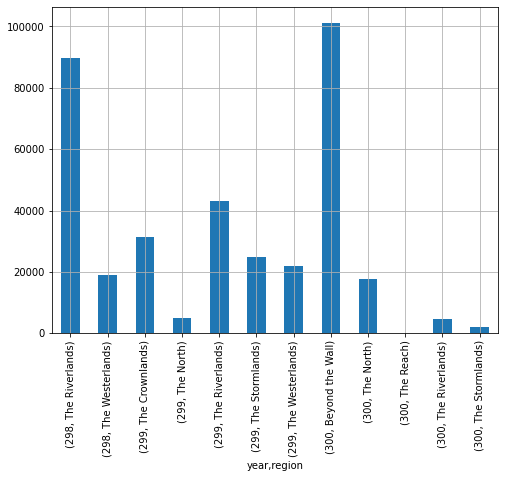

In [293]:
G['people'].plot(kind='bar')
plt.grid()

## Прикладной Анализ Данных

Теперь посмотрим на небольшую аналитическую задачу по предсказанию ухода клиента от телефонного оператора.

In [294]:
df = pd.read_csv('data/telecom_churn.csv')
df.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


Метод **`describe`** показывает основные статистические характеристики данных по каждому числовому признаку (типы `int64` и `float64`): число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили.

In [295]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000,3333.0000
mean,101.0648,437.1824,8.0990,179.7751,100.4356,30.5623,200.9803,100.1143,17.0835,200.8720,100.1077,9.0393,10.2373,4.4794,2.7646,1.5629
std,39.8221,42.3713,13.6884,54.4674,20.0691,9.2594,50.7138,19.9226,4.3107,50.5738,19.5686,2.2759,2.7918,2.4612,0.7538,1.3155
min,1.0000,408.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,23.2000,33.0000,1.0400,0.0000,0.0000,0.0000,0.0000
25%,74.0000,408.0000,0.0000,143.7000,87.0000,24.4300,166.6000,87.0000,14.1600,167.0000,87.0000,7.5200,8.5000,3.0000,2.3000,1.0000
50%,101.0000,415.0000,0.0000,179.4000,101.0000,30.5000,201.4000,100.0000,17.1200,201.2000,100.0000,9.0500,10.3000,4.0000,2.7800,1.0000
75%,127.0000,510.0000,20.0000,216.4000,114.0000,36.7900,235.3000,114.0000,20.0000,235.3000,113.0000,10.5900,12.1000,6.0000,3.2700,2.0000
max,243.0000,510.0000,51.0000,350.8000,165.0000,59.6400,363.7000,170.0000,30.9100,395.0000,175.0000,17.7700,20.0000,20.0000,5.4000,9.0000


Библиотека `seaborn` - более удобная замена `matplotib` в некоторых случаях. Например в рисовании ящиков с усами. Но при этом внутри она реализована на том же `matplotlib` 

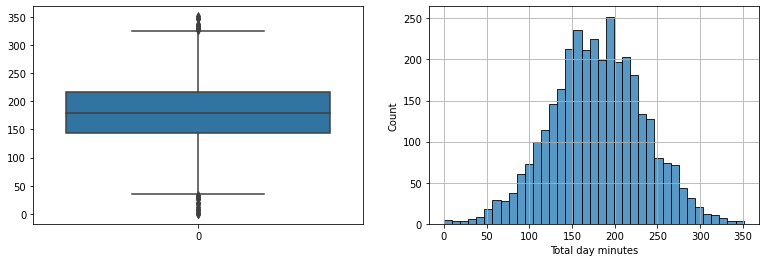

In [296]:
import seaborn as sns
plt.figure(figsize=(13, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=df['Total day minutes'])
plt.subplot(1, 2, 2)
sns.histplot(df['Total day minutes']);
plt.grid()

Чтобы посмотреть статистику по нечисловым признакам, нужно явно указать интересующие нас типы в параметре `include`. Можно также задать `include`='all', чтоб вывести статистику по всем имеющимся признакам.

In [297]:
df.describe(include=['object', 'bool'])

,State,International plan,Voice mail plan,Churn
count,3333,3333,3333,3333
unique,51,2,2,2
top,WV,No,No,False
freq,106,3010,2411,2850


Для категориальных (тип `object`) и булевых (тип `bool`) признаков  можно воспользоваться методом **`value_counts`**. Посмотрим на распределение нашей целевой переменной — `Churn`:

In [298]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

2850 пользователей из 3333 — лояльные, значение переменной `Churn` у них — `0`.

Посмотрим на распределение пользователей по переменной `Area code`. Укажем значение параметра `normalize=True`, чтобы посмотреть не абсолютные числа, а долю от всего количества.

In [299]:
df['Area code'].value_counts(normalize=True)

415    0.4965
510    0.2520
408    0.2514
Name: Area code, dtype: float64

## Сводные таблицы

Допустим, мы хотим посмотреть, как наблюдения в нашей выборке распределены в контексте двух признаков — `Churn` и `Customer service calls`. Для этого мы можем построить **таблицу сопряженности**, воспользовавшись методом **`crosstab`**:

In [300]:
pd.crosstab(df['Churn'], df['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


In [301]:
pd.crosstab(df['Churn'], df['Voice mail plan'], normalize=True)

Voice mail plan,No,Yes
Churn,,
False,0.6025,0.2526
True,0.1209,0.0240


Мы видим, что большинство пользователей — лояльные и пользуются дополнительными услугами (международного роуминга / голосовой почты).

Продвинутые пользователи `Excel` наверняка вспомнят о такой фиче, как **сводные таблицы** (`pivot tables`). В `Pandas` за сводные таблицы отвечает метод **`pivot_table`**, который принимает в качестве параметров:

* `values` – список переменных, по которым требуется рассчитать нужные статистики,
* `index` – список переменных, по которым нужно сгруппировать данные,
* `aggfunc` — то, что нам, собственно, нужно посчитать по группам — сумму, среднее, максимум, минимум или что-то ещё.

Давайте посмотрим среднее число дневных, вечерних и ночных звонков для разных `Area code`:

In [302]:
df.pivot_table(values = ['Total day calls', 'Total eve calls', 'Total night calls'], 
               index = ['Area code'], 
               aggfunc= lambda X: X.mean()) # можно запихать любую агрегирующую функцию


,Total day calls,Total eve calls,Total night calls
Area code,,,
408,100.4964,99.7888,99.0394
415,100.5764,100.5039,100.3982
510,100.0976,99.6714,100.6012


--------



## Первые попытки анализа данных


Посмотрим, как отток связан с признаком **"Подключение международного роуминга"** (`International plan`). Сделаем это с помощью сводной таблички `crosstab`, а также путем иллюстрации с `Seaborn`.

In [303]:
plt.rcParams['figure.figsize'] = (8, 6) # глобально зададим размер картинок

In [304]:
pd.crosstab(df['Churn'], df['International plan'], margins=True)

International plan,No,Yes,All
Churn,,,
False,2664,186,2850
True,346,137,483
All,3010,323,3333


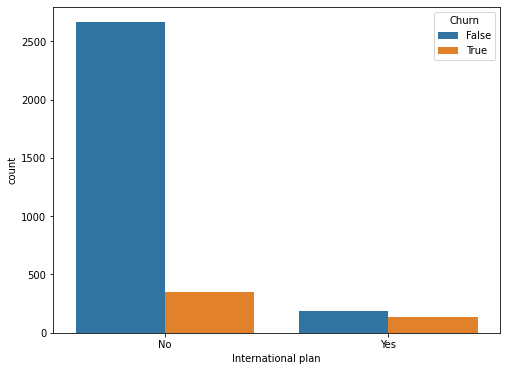

In [305]:
sns.countplot(x='International plan', hue='Churn', data=df);

Видим, что когда роуминг подключен, доля оттока намного выше – интересное наблюдение! Возможно, большие и плохо контролируемые траты в роуминге очень конфликтогенны и приводят к недовольству клиентов телеком-оператора и, соответственно, к их оттоку. 

Далее посмотрим на еще один важный признак – **"Число обращений в сервисный центр"** (`Customer service calls`). Также построим сводную таблицу и картинку.

In [311]:
pd.crosstab(df['Churn'], df['Customer service calls'], margins=True, normalize=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,0.1815,0.3177,0.2016,0.1155,0.0270,0.0078,0.0024,0.0012,0.0003,0.0000,0.8551
True,0.0276,0.0366,0.0261,0.0132,0.0228,0.0120,0.0042,0.0015,0.0003,0.0006,0.1449
All,0.2091,0.3543,0.2277,0.1287,0.0498,0.0198,0.0066,0.0027,0.0006,0.0006,1.0000


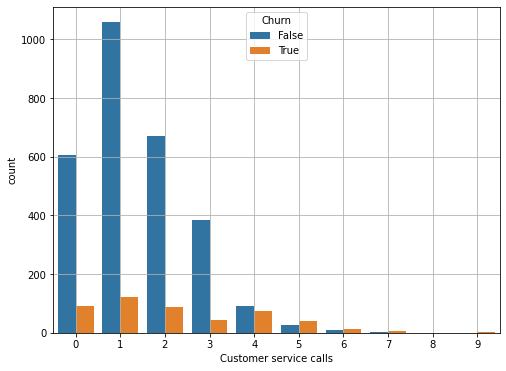

In [307]:
sns.countplot(x='Customer service calls', hue='Churn', data=df);
plt.grid()

Может быть, по сводной табличке это не так хорошо видно (или скучно ползать взглядом по строчкам с цифрами), а вот картинка красноречиво свидетельствует о том, что доля оттока сильно возрастает начиная с 4 звонков в сервисный центр. 

Добавим теперь в наш DataFrame бинарный признак — результат сравнения `Customer service calls > 3`. И еще раз посмотрим, как он связан с оттоком. 

In [308]:
df['Many_service_calls'] = (df['Customer service calls'] > 3).astype('int')

pd.crosstab(df['Many_service_calls'], df['Churn'], margins=True)

Churn,False,True,All
Many_service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


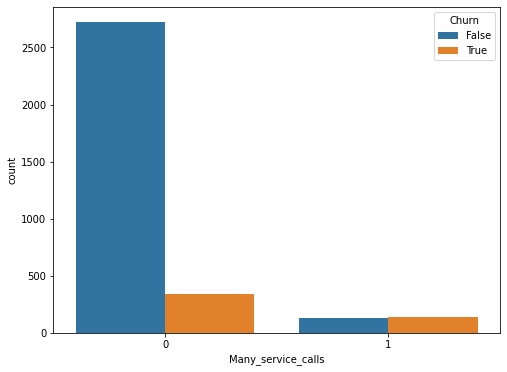

In [309]:
sns.countplot(x='Many_service_calls', hue='Churn', data=df);

Объединим рассмотренные выше условия и построим сводную табличку для этого объединения и оттока.

In [310]:
pd.crosstab(df['Many_service_calls'] & df['International plan'].map({'No': 0, 'Yes':1}) , 
            df['Churn'])

Churn,False,True
row_0,,
0,2841,464
1,9,19


Значит, прогнозируя отток клиента в случае, когда число звонков в сервисный центр больше 3 и подключен роуминг (и прогнозируя лояльность – в противном случае), можно ожидать около 85.8% правильных попаданий (ошибаемся всего 464 + 9 раз). Эти 85.8%, которые мы получили с помощью очень простых рассуждений – это неплохая отправная точка (*baseline*) для дальнейших моделей машинного обучения, которые мы будем строить. 

В целом до появления машинного обучения процесс анализа данных выглядел примерно так. Прорезюмируем:
    
- Доля лояльных клиентов в выборке – 85.5%. Самая наивная модель, ответ которой "Клиент всегда лоялен" на подобных данных будет угадывать примерно в  85.5% случаев. То есть доли правильных ответов (*accuracy*) последующих моделей должны быть как минимум не меньше, а лучше, значительно выше этой цифры;
- С помощью простого прогноза , который условно можно выразить такой формулой: "International plan = True & Customer Service calls > 3 => Churn = 1, else Churn = 0", можно ожидать долю угадываний 85.8%, что еще чуть выше 85.5%
- Эти два бейзлайна мы получили без всякого машинного обучения, и они служат отправной точной для наших последующих моделей. Если окажется, что мы громадными усилиями увеличиваем долю правильных ответов всего, скажем, на 0.5%, то возможно, мы что-то делаем не так, и достаточно ограничиться простой моделью из двух условий. 
- Перед обучением сложных моделей рекомендуется немного покрутить данные и проверить простые предположения. Более того, в бизнес-приложениях машинного обучения чаще всего начинают именно с простых решений, а потом экспериментируют с их усложнением. 

----------

## Полезные материалы

* [Оптимизация Pandas для больших данных](https://habr.com/en/company/ruvds/blog/442516/)
* [Pandas for Data Analysis](https://github.com/jupyter/jupyter/wiki/A-gallery-of-interesting-Jupyter-Notebooks#pandas-for-data-analysis)
* [Сборник полезных тетрадок по Pandas](https://github.com/HorusHeresyHeretic/Pandas_Practice)
* [Learn Pandas](https://bitbucket.org/hrojas/learn-pandas/src/master/)
* [MultiIndex](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)
* [Reshape and Index](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html)

## Источники материалов:
* [mlcourse.ai](https://github.com/Yorko/mlcourse.ai) - курс Машинного обучения с OpenDataScience
* [AI Seminars](https://github.com/AICommunityInno/Seminars) - семинары по Машинному обучению в Иннополисе
* [HSE-ML course](https://github.com/esokolov/ml-course-hse) - курс Машинного обучения ФКН ВШЭ